In [252]:
import pandas as pd
import numpy as np
import requests
import zipfile
import io, os
import matplotlib.pyplot as plt
import seaborn as sns

In [253]:
# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

In [254]:
# funkcja do ściągania podanego archiwum
def download_gios_archive(year, gios_id, filename):
    # Pobranie archiwum ZIP do pamięci
    url = f"{gios_archive_url}{gios_id}"
    response = requests.get(url)
    response.raise_for_status()  # jeśli błąd HTTP, zatrzymaj
    
    # Otwórz zip w pamięci
    with zipfile.ZipFile(io.BytesIO(response.content)) as z:
        # znajdź właściwy plik z PM2.5
        if not filename:
            print(f"Błąd: nie znaleziono {filename}.")
        else:
            # wczytaj plik do pandas
            with z.open(filename) as f:
                try:
                    df = pd.read_excel(f, header=None)
                except Exception as e:
                    print(f"Błąd przy wczytywaniu {year}: {e}")
    return df

In [255]:
df2014 = download_gios_archive(2014, gios_url_ids[2014], gios_pm25_file[2014])
df2014

/home/osboxes/.local/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,Kod stacji,DsWrocWisA,KpAirpWiktorowo,KpBydgPlPozn,KpBydgWarszawska,KpTorunDziewulsk,LdLodzWIOSACzernik,LdZgierzWIOSAMielcza,LuZgoraWIOS_AUT,MpKrakowWIOSAKra6117,...,SkMalogCemen3,SkPolanRuszcz,SlGliwiGliw_mewy,SlKatowKato_kossu,SlZlotyJano_lesni,WmOlsztyWIOS_Puszkin,WpWKP001,WpWKPKalisz007/10,ZpSzczecin001,ZpSzczecin002
1,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,2014-01-01 01:00:00,152,104.56,116.214424,140.857376,52.4172,81.029259,119.696114,NaN,104,...,34.12,56.54,188,104,32,84.121582,56.1,NaN,105.489,109
4,2014-01-01 02:00:00,137,94.3,NaN,121.629723,NaN,210.36467,70.337502,NaN,104,...,34.61,35.93,130,107,39,75.444382,55.2,82.5,149.797,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,2014-12-31 20:00:00,52,8.5,20,46.1,NaN,67.56,78.434807,97.021,118,...,41.1,87.5,49,29,50,44.658291,34.22,52.6,13,41
8759,2014-12-31 21:00:00,53,8.2,15.6,41.4,NaN,64.9,68.647339,23.842,99,...,43.9,80.2,50,25,45,39.835423,33.2521,60.4,8,52
8760,2014-12-31 22:00:00,48,8,14.1,NaN,NaN,64.2,57.358459,20.4708,90,...,41.2,74.5,49,24,44,34.202221,31.19,57.5,41,53
8761,2014-12-31 23:00:00,54,7.3,13.2,34,NaN,54.47,51.250973,20.6976,90,...,39.9,75,50,29,44,26.227037,28.2383,43.6,18,40


In [256]:
df2019 = download_gios_archive(2019, gios_url_ids[2019], gios_pm25_file[2019])
df2019

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,Nr,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
1,Kod stacji,DsDusznikMOB,DsJaworMOB,DsJelGorOgin,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpMogiNowMOB,KpToruDziewu,KpWloclOkrze,...,SlBielPartyz,SlKatoKossut,SlZlotPotLes,WmElbBazynsk,WmGoldUzdrowMOB,WmOlsPuszkin,WpKaliSawick,ZpSzczAndr01,ZpSzczBudzWosMOB,ZpSzczPils02
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,2019-12-31 20:00:00,18.8572,19.2339,11.9203,19.9564,10.5681,27.6,12,9.9,11.5,...,25.3449,16.615,12.1295,7.78593,NaN,2.90071,14.5322,34.8247,15.5959,19.1689
8762,2019-12-31 21:00:00,25.2719,15.621,11.8131,17.1905,8.74933,27.8,8.9,12.9,13.2,...,22.5324,12.5343,10.6563,8.00023,NaN,2.91173,13.365,30.0026,13.1825,19.7136
8763,2019-12-31 22:00:00,37.5381,12.3882,11.3933,13.2909,8.42139,18.7,8.5,4.7,15.5,...,23.8138,11.1997,13.0483,6.67999,NaN,3.0851,13.9552,27.14,14.3764,20.2439
8764,2019-12-31 23:00:00,29.0594,11.5809,9.02694,11.42,8.86111,21.1,8.4,14,10.6,...,24.4337,11.4544,11.7128,6.79077,NaN,3.75481,14.1249,24.8371,17.7941,24.7417


In [257]:
df2024 = download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024])
df2024

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,Nr,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
1,Kod stacji,DsChojnowMalMOB,DsJelGorOgin,DsKlodzSzkol,DsKudowaSzkoMOB,DsWrocAlWisn,DsWrocWybCon,KpBydPlPozna,KpBydWarszaw,KpNaklWawrzy,...,WmElkStadion,WmOlsPuszkin,WpKaliSawick,WpKoscianMayMOB,WpPoznDabrow,WpPoznSzwajc,ZpDabkiSztorMOB,ZpKolZolkiew,ZpSzczAndrze,ZpSzczPilsud
2,Wskaźnik,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,...,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5,PM2.5
3,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
4,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,2024-12-31 20:00:00,53,48.3,34.3,28.4,51.4,27.7,5.4,34.1,43.1,...,13.5,16,25.4,NaN,22,35.3,NaN,10.9,8.4,14
8786,2024-12-31 21:00:00,33.7,67,33.3,33.6,65.5,19.9,7.7,34.6,29.4,...,11.8,19.3,25,NaN,22.9,28.5,NaN,9,12.8,12.7
8787,2024-12-31 22:00:00,57.7,72.7,32.4,44.1,30.2,17.4,14.5,29.3,12.7,...,9.6,26.9,24,NaN,21.3,23.4,NaN,8.2,20.7,12.1
8788,2024-12-31 23:00:00,75.5,79.9,30.7,56.2,36,23.6,NaN,16,11.6,...,14,23,23.6,NaN,23.2,24.2,NaN,7.8,13.4,12.7


# Zadanie 1

In [263]:
def clear_data(df, nr_col, to_remove, good_year):
    
    code_stations = df.iloc[nr_col, 1:].tolist()
    
    print("liczba stacji w roku", str(good_year), ":", str(len(code_stations)))

    #Usunięcie niepotrzebnych wierszy
    df = df.iloc[to_remove:].reset_index(drop=True)

    #oznaczenie kolumny czas i dodanie kodów stacji; konwersja na datetime
    df.columns = ['czas'] + code_stations
    try:
        df['czas'] = pd.to_datetime(df['czas'], errors='coerce')
    except:
        raise ValueError("nieprawidłowa data!")
    
    # Usunięcie złych wierszy
    df = df.dropna(subset=['czas']).reset_index(drop=True)

    # Przesunięcie pomiarów o północy na dzień poprzedni (z wyłączeniem zmiany 1 stycznia o północy; 
    # taki pomiar zalicza się do poprzedniego, dla którego dane nas nie interesują
    mask_midnight = df['czas'].dt.hour == 0
    df.loc[mask_midnight, 'czas'] = df.loc[mask_midnight, 'czas'] - pd.Timedelta(days=1, seconds=1)
    df = df[df['czas'].dt.year == good_year]

    #Przygotowanie df do analizy danych
    df = df.melt(id_vars='czas', var_name='stacja', value_name='wartosc')

    return df

In [264]:
df2024_clean = clear_data(df2024, 1, 5, 2024)
df2019_clean = clear_data(df2019, 1, 5, 2019)
df2014_clean = clear_data(df2014, 0, 3, 2014)

liczba stacji w roku 2024 : 96


<ipython-input-263-6a3aee1ce014>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['czas'] = pd.to_datetime(df['czas'], errors='coerce')


liczba stacji w roku 2019 : 63


<ipython-input-263-6a3aee1ce014>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['czas'] = pd.to_datetime(df['czas'], errors='coerce')


liczba stacji w roku 2014 : 35


In [265]:
df2014_clean

,czas,stacja,wartosc
0,2014-01-01 01:00:00,DsWrocWisA,152
1,2014-01-01 02:00:00,DsWrocWisA,137
2,2014-01-01 03:00:00,DsWrocWisA,129
3,2014-01-01 04:00:00,DsWrocWisA,129
4,2014-01-01 05:00:00,DsWrocWisA,105
...,...,...,...
306560,2014-12-31 20:00:00,ZpSzczecin002,41
306561,2014-12-31 21:00:00,ZpSzczecin002,52
306562,2014-12-31 22:00:00,ZpSzczecin002,53
306563,2014-12-31 23:00:00,ZpSzczecin002,40


In [266]:
def load_metadane():
    #wczytanie metadanych
    meta = pd.read_excel('metadane.xlsx')
    return meta

In [267]:
def update_data(df, meta):
    
    #słownik klucz: stary kod, wartość: nowy kod
    code_map = {old_code.strip(): row['Kod stacji'] for _, row in meta.iterrows()
    for old_code in str(row['Stary Kod stacji \n(o ile inny od aktualnego)'] or '').split(',')
    if old_code.strip()}  #gwarancja braku pustych kluczy w słowniku

    #uaktualnienie nazw stacji w df
    df['stacja'] = df['stacja'].replace(code_map)
    
    return df

In [268]:
df_test = pd.DataFrame({
    'stacja': ['001', '002', '003', '004'],
    'wartosc': [12, 15, 20, 5]
})

meta_test = pd.DataFrame({
    'Kod stacji': ['101', '102', '103'],
    'Stary Kod stacji \n(o ile inny od aktualnego)': ['001', '003,004', None]
})

print("Przed aktualizacją:")
print(df_test)

df_updated = update_data(df_test, meta_test)

print("Po aktualizacji:")
print(df_updated)
#001 -> 101;
#002 bez zmian (nie jest starym kodem);
#003 i 004 -> 002 (oba są starym kodami, oba zmieniają się na 002)
#103 nie ma starego kodu, ale jest też nieistotny w kontekście df_test

Przed aktualizacją:
  stacja  wartosc
0    001       12
1    002       15
2    003       20
3    004        5
Po aktualizacji:
  stacja  wartosc
0    101       12
1    002       15
2    102       20
3    102        5


In [269]:
def add_place(df, meta):
    #słownik klucz: kod stacji, wartość: miejscowość stacji; 
    place_map = dict(zip(meta['Kod stacji'], meta['Miejscowość']))

    #utworzenie kolumny 'miejscowosc' i przypisanie każdej stacji w df odpowiedniej miejscowości 
    df['miejscowosc'] = df['stacja'].map(place_map) 
    
    df = df[['czas', 'stacja', 'miejscowosc', 'wartosc']] #ustawienie kolejności kolumn

    return df

In [270]:
meta = load_metadane()
df2024_upd = update_data(df2024_clean, meta)
df2024_ready = add_place(df2024_upd, meta)
df2024_ready

,czas,stacja,miejscowosc,wartosc
0,2024-01-01 01:00:00,DsChojnowMalMOB,Chojnów,NaN
1,2024-01-01 02:00:00,DsChojnowMalMOB,Chojnów,NaN
2,2024-01-01 03:00:00,DsChojnowMalMOB,Chojnów,NaN
3,2024-01-01 04:00:00,DsChojnowMalMOB,Chojnów,NaN
4,2024-01-01 05:00:00,DsChojnowMalMOB,Chojnów,NaN
...,...,...,...,...
843163,2024-12-31 20:00:00,ZpSzczPilsud,Szczecin,14
843164,2024-12-31 21:00:00,ZpSzczPilsud,Szczecin,12.7
843165,2024-12-31 22:00:00,ZpSzczPilsud,Szczecin,12.1
843166,2024-12-31 23:00:00,ZpSzczPilsud,Szczecin,12.7


In [271]:
df2019_upd = update_data(df2019_clean, meta)
df2019_ready = add_place(df2019_upd, meta)
df2019_ready

,czas,stacja,miejscowosc,wartosc
0,2019-01-01 01:00:00,DsDusznikMOB,Duszniki-Zdrój,33.4053
1,2019-01-01 02:00:00,DsDusznikMOB,Duszniki-Zdrój,13.8028
2,2019-01-01 03:00:00,DsDusznikMOB,Duszniki-Zdrój,9.94056
3,2019-01-01 04:00:00,DsDusznikMOB,Duszniki-Zdrój,6.75889
4,2019-01-01 05:00:00,DsDusznikMOB,Duszniki-Zdrój,7.88722
...,...,...,...,...
551812,2019-12-31 20:00:00,ZpSzczPilsud,Szczecin,19.1689
551813,2019-12-31 21:00:00,ZpSzczPilsud,Szczecin,19.7136
551814,2019-12-31 22:00:00,ZpSzczPilsud,Szczecin,20.2439
551815,2019-12-31 23:00:00,ZpSzczPilsud,Szczecin,24.7417


In [272]:
df2014_upd = update_data(df2014_clean, meta)
df2014_ready = add_place(df2014_upd, meta)
df2014_ready

,czas,stacja,miejscowosc,wartosc
0,2014-01-01 01:00:00,DsWrocAlWisn,Wrocław,152
1,2014-01-01 02:00:00,DsWrocAlWisn,Wrocław,137
2,2014-01-01 03:00:00,DsWrocAlWisn,Wrocław,129
3,2014-01-01 04:00:00,DsWrocAlWisn,Wrocław,129
4,2014-01-01 05:00:00,DsWrocAlWisn,Wrocław,105
...,...,...,...,...
306560,2014-12-31 20:00:00,ZpSzczPilsud,Szczecin,41
306561,2014-12-31 21:00:00,ZpSzczPilsud,Szczecin,52
306562,2014-12-31 22:00:00,ZpSzczPilsud,Szczecin,53
306563,2014-12-31 23:00:00,ZpSzczPilsud,Szczecin,40


In [273]:
# unikalne kody stacji w każdym roku
stations2014 = set(df2014_ready['stacja'].unique())
stations2019 = set(df2019_ready['stacja'].unique())
stations2024 = set(df2024_ready['stacja'].unique())

#część wspólna kodów z każdego roku
common_stations = stations2014 & stations2019 & stations2024

print("Liczba wspólnych stacji: " + str(len(common_stations)))

df2014_common = df2014_ready[df2014_ready['stacja'].isin(common_stations)].copy()
df2019_common = df2019_ready[df2019_ready['stacja'].isin(common_stations)].copy()
df2024_common = df2024_ready[df2024_ready['stacja'].isin(common_stations)].copy()

#dodanie kolumny rok
df2014_common['rok'] = 2014
df2019_common['rok'] = 2019
df2024_common['rok'] = 2024

#złączenie df dla trzech lat w jeden df 
df_all = pd.concat([df2014_common, df2019_common, df2024_common], ignore_index=True)


Liczba wspólnych stacji: 23


In [274]:
df_all

,czas,stacja,miejscowosc,wartosc,rok
0,2014-01-01 01:00:00,DsWrocAlWisn,Wrocław,152,2014
1,2014-01-01 02:00:00,DsWrocAlWisn,Wrocław,137,2014
2,2014-01-01 03:00:00,DsWrocAlWisn,Wrocław,129,2014
3,2014-01-01 04:00:00,DsWrocAlWisn,Wrocław,129,2014
4,2014-01-01 05:00:00,DsWrocAlWisn,Wrocław,105,2014
...,...,...,...,...,...
604918,2024-12-31 20:00:00,ZpSzczPilsud,Szczecin,14,2024
604919,2024-12-31 21:00:00,ZpSzczPilsud,Szczecin,12.7,2024
604920,2024-12-31 22:00:00,ZpSzczPilsud,Szczecin,12.1,2024
604921,2024-12-31 23:00:00,ZpSzczPilsud,Szczecin,12.7,2024


In [275]:
#zapisanie zbiorczego, oczyszczonego i ujednoliconego DateFrame do pliku
df_all.to_csv("danePM25_2014_2019_2024.csv", index=True)

# Zadanie 2

In [276]:
#dodanie kolumny z miesiącem i zmienienie kolejności kolumn na bardziej czytelną
df_all['miesiac'] = df_all['czas'].dt.month
df_all = df_all[['czas', 'stacja', 'miejscowosc', 'rok', 'miesiac', 'wartosc']]
df_all

,czas,stacja,miejscowosc,rok,miesiac,wartosc
0,2014-01-01 01:00:00,DsWrocAlWisn,Wrocław,2014,1,152
1,2014-01-01 02:00:00,DsWrocAlWisn,Wrocław,2014,1,137
2,2014-01-01 03:00:00,DsWrocAlWisn,Wrocław,2014,1,129
3,2014-01-01 04:00:00,DsWrocAlWisn,Wrocław,2014,1,129
4,2014-01-01 05:00:00,DsWrocAlWisn,Wrocław,2014,1,105
...,...,...,...,...,...,...
604918,2024-12-31 20:00:00,ZpSzczPilsud,Szczecin,2024,12,14
604919,2024-12-31 21:00:00,ZpSzczPilsud,Szczecin,2024,12,12.7
604920,2024-12-31 22:00:00,ZpSzczPilsud,Szczecin,2024,12,12.1
604921,2024-12-31 23:00:00,ZpSzczPilsud,Szczecin,2024,12,12.7


In [277]:
#wyliczenie średniej stężenia PM2.5 w każdym miesiącu, dla konkretnych stacji i lat
mean_month = (df_all.groupby(['rok', 'stacja', 'miesiac'])['wartosc'].mean().reset_index()
    .rename(columns={'wartosc': 'srednie miesieczne stezenie PM25'}))
mean_month

,rok,stacja,miesiac,srednie miesieczne stezenie PM25
0,2014,DsWrocAlWisn,1,42.786667
1,2014,DsWrocAlWisn,2,38.627642
2,2014,DsWrocAlWisn,3,36.121317
3,2014,DsWrocAlWisn,4,25.353659
4,2014,DsWrocAlWisn,5,14.924964
...,...,...,...,...
823,2024,ZpSzczPilsud,8,12.769489
824,2024,ZpSzczPilsud,9,16.869444
825,2024,ZpSzczPilsud,10,16.21707
826,2024,ZpSzczPilsud,11,12.299861


In [278]:
miasta = ['Warszawa', 'Katowice']
lata = [2014, 2024]

#wybór konkretnych miast i lat z df_all
df_wybrane = df_all[(df_all['miejscowosc'].isin(miasta)) & (df_all['rok'].isin(lata))].copy()
df_wybrane['miesiac'] = df_wybrane['czas'].dt.month

#średnie miesięczne stężenia PM25, ale tylko dla Warszawy i Katowic w latach 2014 i 2024
srednie_miesieczne = (df_wybrane.groupby(['miejscowosc', 'rok', 'miesiac'])['wartosc'].mean().reset_index()
    .rename(columns={'wartosc': 'srednie_PM25'}))

srednie_miesieczne

,miejscowosc,rok,miesiac,srednie_PM25
0,Katowice,2014,1,47.540832
1,Katowice,2014,2,57.551302
2,Katowice,2014,3,42.77027
3,Katowice,2014,4,26.921316
4,Katowice,2014,5,14.875843
5,Katowice,2014,6,13.739191
6,Katowice,2014,7,12.442799
7,Katowice,2014,8,11.364865
8,Katowice,2014,9,22.628651
9,Katowice,2014,10,34.481119


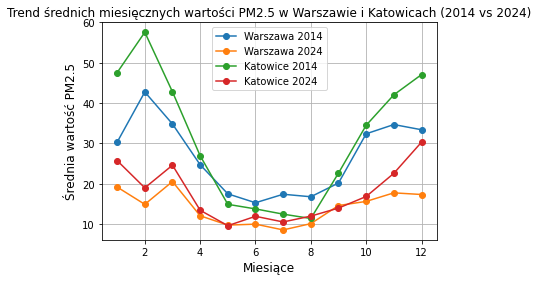

In [279]:
#Rysowanie wykresu

#pętla po miastach i latach tak, by dostać 4 linie trendu liniowego 
for miasto in miasta:
    for rok in lata:
        df_plot = srednie_miesieczne[
            (srednie_miesieczne['miejscowosc'] == miasto) &
            (srednie_miesieczne['rok'] == rok)]
        plt.plot(df_plot['miesiac'], df_plot['srednie_PM25'], marker='o', label=f"{miasto} {rok}") #rysowanie wykresu 


plt.xlabel('Miesiące', fontsize=12)
plt.ylabel('Średnia wartość PM2.5', fontsize=12)
plt.title("Trend średnich miesięcznych wartości PM2.5 w Warszawie i Katowicach (2014 vs 2024)")
plt.grid()
plt.legend()
plt.show()

Interpretacja:
Wykres powyżej przedstawia średnie stężenie PM2.5 w zależności od miesiąca w latach 2014, 2024 w Warszawie i Katowicach. Nietrudno zauważyć, że w obu miastach przez te 10 lat stężenie PM2.5 znacznie zmalało. Najmniejsze zmiany na przekroju tych lat obserwujemy w ciepłe, letnie miesiące, zaś w chłodniejszych miesiącach obserwujemy spadek nawet do 48 ug/m3 (luty Katowice). Na wykresie widać także, że w Warszawie przez większość czasu odnotowujemy wyższe stężenia pyłów niż w Katowicach.

# Zadanie 3

In [280]:
#średnie miesięczne stężenia PM25 dla wszystkich miast w latach 2014, 2019 i 2024
wszystkie_srednie = (df_all.groupby(['miejscowosc', 'rok', 'miesiac'])['wartosc'].mean()
    .reset_index().rename(columns={'wartosc': 'srednie_PM25'}))

wszystkie_srednie

,miejscowosc,rok,miesiac,srednie_PM25
0,Bydgoszcz,2014,1,30.616434
1,Bydgoszcz,2014,2,51.878813
2,Bydgoszcz,2014,3,40.47287
3,Bydgoszcz,2014,4,19.756345
4,Bydgoszcz,2014,5,11.908087
...,...,...,...,...
715,Żyrardów,2024,8,9.489906
716,Żyrardów,2024,9,14.390417
717,Żyrardów,2024,10,16.485445
718,Żyrardów,2024,11,19.621836


In [281]:
#Największe stężenie PM2.5, wyznaczone dla przejrzystości heatmapy
max_PM25 = wszystkie_srednie['srednie_PM25'].max()
max_PM25

74.82537313432836

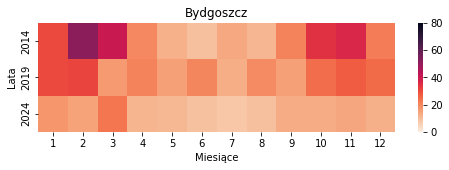

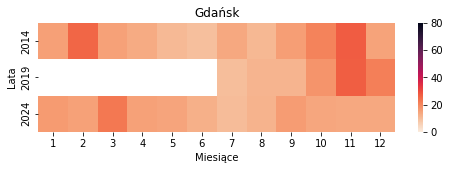

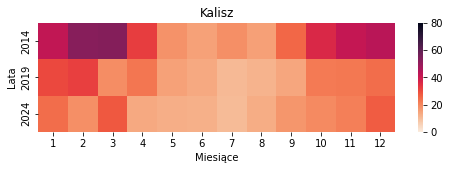

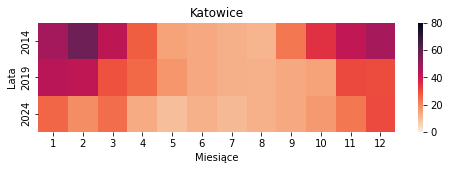

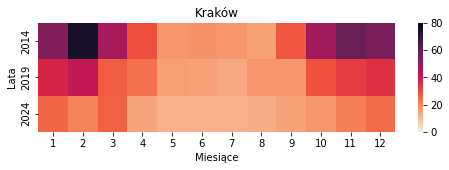

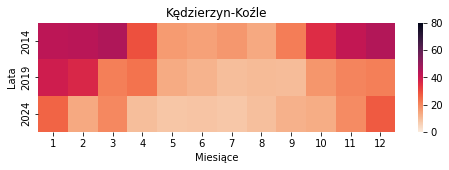

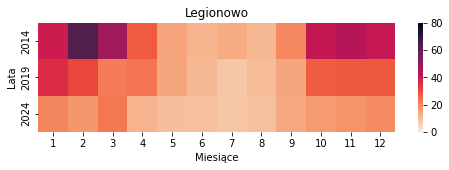

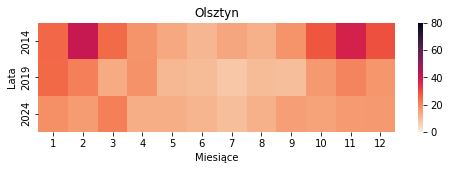

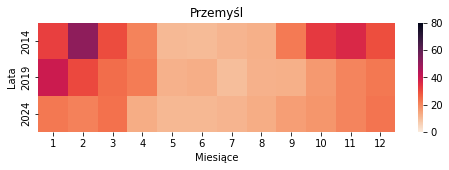

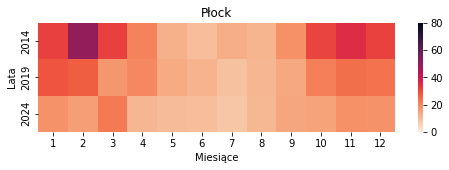

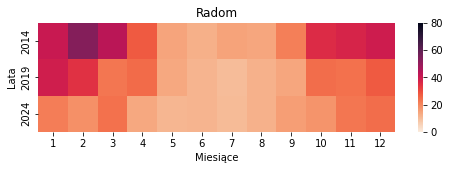

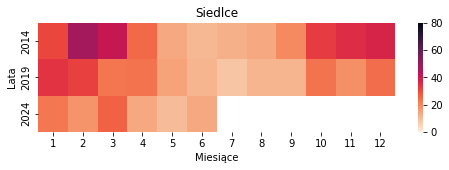

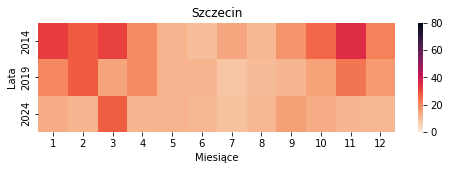

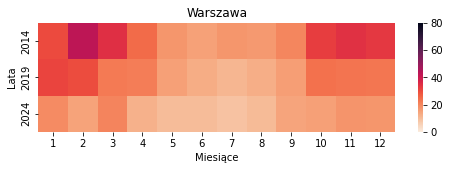

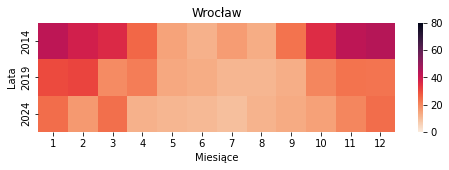

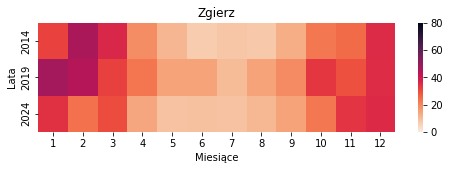

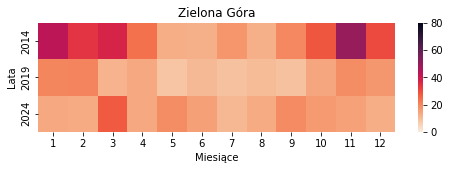

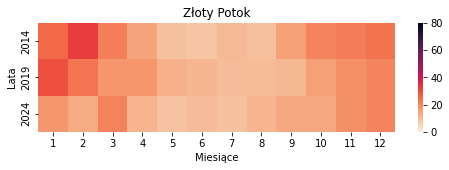

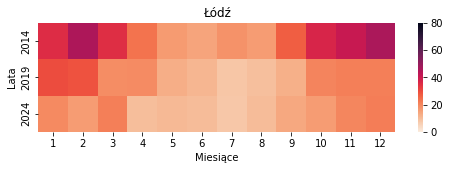

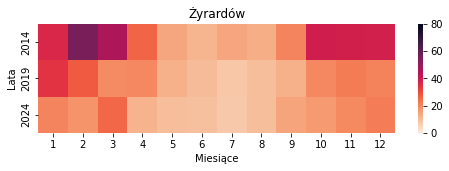

In [282]:
#Lista badanych miast
miasta = wszystkie_srednie['miejscowosc'].unique()

#Pętla generująca heatmapy dla poszczególnych miast
for miasto in miasta:
    #Dane średnich stężeń dla kolejnych miast
    m_srednie = wszystkie_srednie[(wszystkie_srednie['miejscowosc'].isin([miasto]))]
    #Uporządkowanie danych w celu utworzenia z nich heatmapy
    h_data = m_srednie.pivot_table(values='srednie_PM25', index='rok', columns='miesiac').astype('float')
    plt.figure(figsize=(8, 2))
    sns.heatmap(h_data, cmap='rocket_r', vmin=0.0, vmax=80.0, cbar=True)
    plt.xlabel('Miesiące')
    plt.ylabel('Lata')
    plt.title(miasto)
    
plt.show()

Interpretacja: Powyższe heatmapy przedstawiają średnie stężenie PM2.5 w zależności od miesiąca w latach 2014, 2019
i 2024 dla poszczególnych miast. Wskazują one na wyraźną poprawę jakości powietrza na przestrzeni lat
w zdecydowanej większości z nich, szczególnie w okresie zimowym.


# Zadanie 4

In [283]:
#Tabela dobowych stężeń dla wszystkich stacji wynikająca z jednostkowych pomiarów.
dobowe_srednie = ( df_all.groupby(['stacja', 'rok', df_all['czas']
    .dt.date])['wartosc'].mean().reset_index() .rename(columns={'czas': 'data', 'wartosc': 'pm25_dobowe'}) )

dobowe_srednie

,stacja,rok,data,pm25_dobowe
0,DsWrocAlWisn,2014,2014-01-01,63.416667
1,DsWrocAlWisn,2014,2014-01-02,51.130435
2,DsWrocAlWisn,2014,2014-01-03,42.956522
3,DsWrocAlWisn,2014,2014-01-04,29.095238
4,DsWrocAlWisn,2014,2014-01-05,31.0
...,...,...,...,...
25203,ZpSzczPilsud,2024,2024-12-27,8.5625
25204,ZpSzczPilsud,2024,2024-12-28,11.608333
25205,ZpSzczPilsud,2024,2024-12-29,17.491667
25206,ZpSzczPilsud,2024,2024-12-30,11.225


In [284]:
#Tablica binarna stwierdzająca, czy zmierzone stężenia PM2.5 przekraczały dobową normę
dobowe_srednie['przekroczenie'] = ((dobowe_srednie['pm25_dobowe'] > 15).astype(int))

dobowe_srednie

,stacja,rok,data,pm25_dobowe,przekroczenie
0,DsWrocAlWisn,2014,2014-01-01,63.416667,1
1,DsWrocAlWisn,2014,2014-01-02,51.130435,1
2,DsWrocAlWisn,2014,2014-01-03,42.956522,1
3,DsWrocAlWisn,2014,2014-01-04,29.095238,1
4,DsWrocAlWisn,2014,2014-01-05,31.0,1
...,...,...,...,...,...
25203,ZpSzczPilsud,2024,2024-12-27,8.5625,0
25204,ZpSzczPilsud,2024,2024-12-28,11.608333,0
25205,ZpSzczPilsud,2024,2024-12-29,17.491667,1
25206,ZpSzczPilsud,2024,2024-12-30,11.225,0


In [285]:
#Tabela sumująca ilość wykroczeń dla każdej stacji względem lat 2014, 2019 i 2024
wykroczenia = ( dobowe_srednie.groupby(['stacja', 'rok'])['przekroczenie'].sum()
    .reset_index() .rename(columns={'przekroczenie': 'ilość przekroczeń'}) )

wykroczenia

,stacja,rok,ilość przekroczeń
0,DsWrocAlWisn,2014,259
1,DsWrocAlWisn,2019,181
2,DsWrocAlWisn,2024,135
3,KpBydPlPozna,2014,219
4,KpBydPlPozna,2019,230
...,...,...,...
64,ZpSzczAndrze,2019,118
65,ZpSzczAndrze,2024,70
66,ZpSzczPilsud,2014,215
67,ZpSzczPilsud,2019,164


In [286]:
#Tabela dla roku 2024
wykroczenia_2024 = wykroczenia[wykroczenia['rok'] == 2024]

wykroczenia_2024

,stacja,rok,ilość przekroczeń
2,DsWrocAlWisn,2024,135
5,KpBydPlPozna,2024,106
8,LdLodzCzerni,2024,128
11,LdZgieMielcz,2024,188
14,LuZielKrotka,2024,140
17,MpKrakAlKras,2024,179
20,MpKrakBulwar,2024,158
23,MzLegZegrzyn,2024,123
26,MzPlocMiReja,2024,130
29,MzRadTochter,2024,163


In [287]:
#Wyznaczenie 3 stacji o największej liczbie wykroczeń w roku 2024, i 3 o najmniejszej
max_3 = wykroczenia_2024.nlargest(3, 'ilość przekroczeń')
min_3 = wykroczenia_2024.nsmallest(3, 'ilość przekroczeń')

wybrane_stacje = pd.concat([max_3, min_3])['stacja'].tolist()

wybrane_stacje

['LdZgieMielcz',
 'MpKrakAlKras',
 'MzRadTochter',
 'ZpSzczAndrze',
 'MzSiedKonars',
 'MzWarWokalna']

In [288]:
#Tabela wykroczeń dla wybranych stacji dla lat 2014, 2019 i 2024
dane_wykroczen = wykroczenia[wykroczenia['stacja'].isin(wybrane_stacje)].copy()

dane_wykroczen

,stacja,rok,ilość przekroczeń
9,LdZgieMielcz,2014,189
10,LdZgieMielcz,2019,245
11,LdZgieMielcz,2024,188
15,MpKrakAlKras,2014,352
16,MpKrakAlKras,2019,295
17,MpKrakAlKras,2024,179
27,MzRadTochter,2014,271
28,MzRadTochter,2019,213
29,MzRadTochter,2024,163
30,MzSiedKonars,2014,246


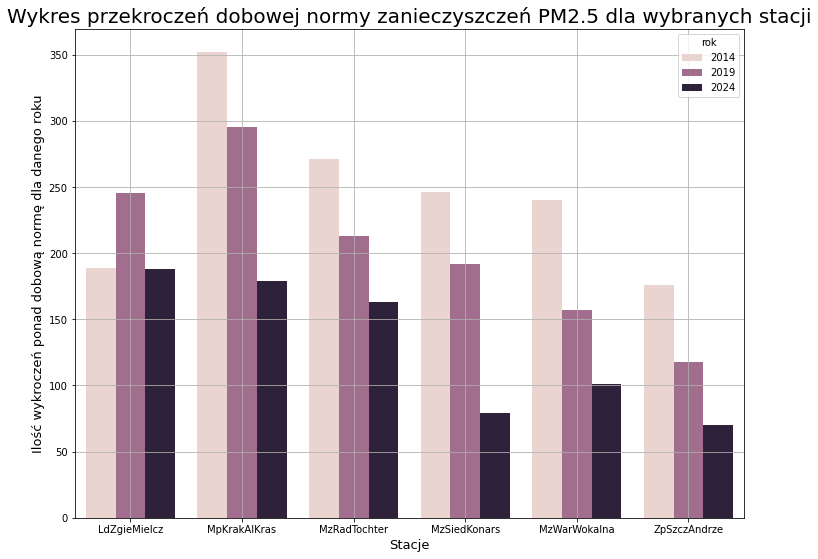

In [300]:
#Wygenerowanie grupowego wykresu słupkowego dla powyższych danych
plt.figure(figsize=(12, 9))
sns.barplot(data=dane_wykroczen, x='stacja', y='ilość przekroczeń', hue='rok', width=0.8)
plt.title("Wykres przekroczeń dobowej normy zanieczyszczeń PM2.5 dla wybranych stacji", size=20)
plt.ylabel("Ilość wykroczeń ponad dobową normę dla danego roku", size=13)
plt.xlabel("Stacje", size=13)
plt.grid()
plt.show()

Interpretacja: Powyższy grupowy wykres słupkowy przedstawia sumaryczne ilości wykroczeń ponad dobową normę zanieczyszczeń PM2.5 dla wybranych stacji w latach 2014, 2019 i 2024. Widoczne jest, że w roku 2014 nawet stacje o najmniejszej ilości wykroczeń przekraczały normę przez pond pół roku, natomiast stacja o najgorszych wynikach przekraczała te normy przez prawie cały rok. Jednak w kolejnych latach ilość przekroczeń normy malała w stosunku do lat poprzednich.

Anna Lipińska - zadania 1 i 2, Krzysztof Sikora - zadania 3 i 4